
# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analysing no show medical appointments data in Brazil. I am using a dataset which contains information about 100k medical appointments. Main focus of this project will be to find how different characteristics related to patient or appintment affects the rate of no show. 

A number of characteristics about the patient's appointment are included in each row. There are total 110,527 rows for medical appointments and total 14 columns for associated characteristics.

### Column Description:

1. PatientId - Identification of a patient
2. AppointmentID - Identification of each appointment
3. Gender - Male or Female
4. ScheduledDay - The day of the actuall appointment, when patient have to visit the doctor.
5. AppointmentDay - The day when patient called to schedule the appointment.
6. Age - Age of the patient.
7. Neighbourhood - Location of the hospital.
8. Scholarship - 0 or 1. It indicates whether or not the patient is enrolled in Brasilian welfare program.
9. Hipertension - 0 or 1.
10. Diabetes - 0 or 1.
11. Alcoholism - 0 or 1.
12. Handcap - 0 or 1
13. SMS_received - 1 or more messages sent to the patient.
14. No-show -  Yes or No. (‘No’ - if the patient showed up to their appointment) and (‘Yes’ - if they did not show up).

### Questions To Explore:

1. Weather a particular gender has more no show rate than other?
2. Does people who receive text message about their appointment are less likely to miss it?
3. No show trends among the people of different age.
4. Does time elapsed between appointment setup date and actual appointment date affects the trends of no show?
5. Weather an enrollment in healthcare walefare program affects the no show rate?

In [1]:
# Importing all the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Adding matplotlib inline to show plots in notebook 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties:



In [2]:
# Loading data and parsing date columns. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates = ['ScheduledDay', 'AppointmentDay'] )
# Printing firtst 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Displaying information about the dataset to inspect datatypes and to look for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [4]:
# Cheking for duplicate rows
sum(df.duplicated())

0

In [5]:
# Printing summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Checking different values entered in column 'Gender' and checking for any invalid inputs
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Dates in ScheduledDay and AppointmentDay column for each row is valid only if the AppointmentDay is later than the ScheduledDay. To check this, I am creating a new column "Diff_days" which will store the value of time gap in days between ScheduledDay and AppointmentDay. 

In [7]:
# Creating new column 'Diff_days'
df['Diff_days'] = (df['AppointmentDay']-df['ScheduledDay']).astype('timedelta64[D]').astype(int)
df.Diff_days

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: Diff_days, Length: 110527, dtype: int32

### Dataset Obeservations:

1. There are 110,527 rows and 14 columns.
2. All the columns have proper datatypes for representing the respective characteristics.
3. There are no missing values in any column.
4. There are no duplicate records in the dataset.
5. For analysing above suggested questions, columns-(PatientId, AppointmentID, Neighbourhood, Hipertension, Diabetes, Alcoholism, Handcap) are not needed and hence need to be droped.
6. In column Age, the minimum value is '-1' which is invalid and the max value is '115' which could be valid but very rare. So to keep the data consistent, only the rows where Age is between 0-100 will be used for the analysis and other rows will be dropped.
7. In Diff_days column, all the values less than 0 are invalid. Because, AppointmentDay has to be on same day or later than the ScheduledDay. So all the rows with invalid input for Day columns needs to be dropped.
8. Column names should be in same format. Hence, 'No-show' needs to be changed to 'No_show'

### Data Cleaning:

To clean this dataset for analysing above questions, we will drop the unsed columns and rename required column in this section.

#### Step 1- Dropping columns not useful for this analysis

In [8]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)

#### Step 2- Deleting rows with invalid Age values and keeping rows with Age values from 0 to 100

In [9]:
# Creating mask for rows with invalid Age
invalid_age = df[(df.Age > 100) | (df.Age < 0)]
invalid_age

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show,Diff_days
58014,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,0,0,No,-1
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,0,0,Yes,2
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,0,0,Yes,2
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,0,0,Yes,37
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,0,0,No,-1
90372,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,0,0,No,1
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,0,1,No,14
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,0,0,No,-1


In [10]:
# Dropping the rows with invalid Age values using 'invalid_age' mask
df.drop(invalid_age.index,inplace=True)

#### Step 3- Dropping rows with invalid dates in 'AppointmentDay' and 'ScheduledDay' columns using values from 'Diff_days' column

In [11]:
df.drop(df[df.Diff_days < 0].index, inplace=True)

#### Step 4- Renaming column 'No-show' to 'No_show'

In [12]:
df.rename(columns={"No-show": "No_show"}, inplace=True)

#### Step 5- Printing summary statistics of cleaned data

In [13]:
df.describe()

,Age,Scholarship,SMS_received,Diff_days
count,71954.000000,71954.000000,71954.000000,71954.000000
mean,38.497429,0.092712,0.493107,14.642258
std,22.917899,0.290030,0.499956,16.494483
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,3.000000
50%,39.000000,0.000000,0.000000,8.000000
75%,57.000000,0.000000,1.000000,21.000000
max,100.000000,1.000000,1.000000,178.000000


#### Step 6- Printing information about cleaned data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71954 entries, 5 to 110526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Gender          71954 non-null  object             
 1   ScheduledDay    71954 non-null  datetime64[ns, UTC]
 2   AppointmentDay  71954 non-null  datetime64[ns, UTC]
 3   Age             71954 non-null  int64              
 4   Scholarship     71954 non-null  int64              
 5   SMS_received    71954 non-null  int64              
 6   No_show         71954 non-null  object             
 7   Diff_days       71954 non-null  int32              
dtypes: datetime64[ns, UTC](2), int32(1), int64(3), object(2)
memory usage: 4.7+ MB


#### Step 7- Saving new clean dataset to a csv file

In [15]:
df.to_csv('clean_noshowappointments_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
# Setting up background style for plots
sns.set_style("darkgrid")

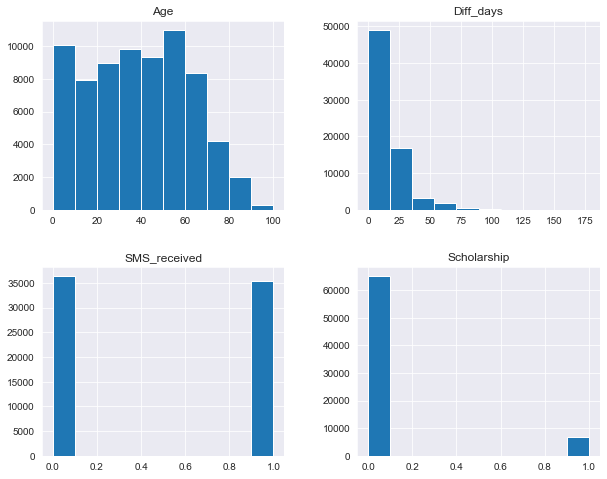

In [41]:
# Plotting histogram for entire dataframe to see how the different characteristics are distributed
df.hist(figsize=(10,8));

In [17]:
# Checking total count for showed up and No show appointments. 
df.No_show.value_counts()

No     51435
Yes    20519
Name: No_show, dtype: int64

### Creating masks for showed up and no show appointments. 
These masks can be used in further exploratory data analysis for answering the above proposed questions.

In [18]:
# Creating masks for people who showed up
Showed_up = df.No_show == "No"

In [19]:
# Creating masks for people who did not show up
Not_showed = df.No_show == "Yes"

### Research Question 1: Weather a particular gender has more no show rate than other?

#### Writing a function "find_association" to find how different parameters given in the dataset are associated with No_show rate in the appointments.

This function takes parameter-name as input and use it to calculate percentage of no show appointments in each value count of the given parameter. In the cleaned dataset, there are exactly two different values in each column except for the age and date columns. This function also plots the calculated percentages on bar chart and finally returns list of percentages for each value count and the plot. 

In [20]:
def find_association(parameter):
    # Series of total number of appointments in each value count of the given parameter
    total = df[parameter].value_counts()
    
    # Series of total number of no show appointments in each value count of the given parameter
    total_no_show = df[parameter][Not_showed].value_counts()
    
    # Calculating percentage of no show appointments in each value count of the given parameter using for loop
    no_show_perc = [] # List to save percentage for each value count
    for i in total.index:
        no_show_perc.append(total_no_show[i] *100 / total[i])
    
    # Ploting bar chart to represent percentage for each value count
    plt.bar(total.index, no_show_perc, width =0.4, color='b', alpha=.7, label='No_show');
    # Title of the bar chart
    plt.title("Percentage of No_show appoinments based on {}".format(parameter))
    # y-axis label
    plt.ylabel("Percentage of No_show appointments")
    
    return no_show_perc, plt

#### Calling find_association() for Gender 
Also, showing the bar chart and printing the percentage values.

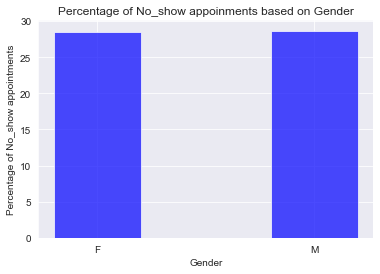

Percentage of female who did not show up: 28.442733797981898 %
Percentage of male who did not show up: 28.665913181799155 %


In [21]:
# Calling find_association() for Gender
parameter_perc, plt = find_association('Gender')
# x-axis label
plt.xlabel("Gender")
# Calling show() to show the bar chart
plt.show()

# As obsereved earlier, there two unique values in gender column-(F or M)
# Printing percentages of no show for F and M

print("Percentage of female who did not show up:", parameter_perc[0],"%")
print("Percentage of male who did not show up:", parameter_perc[1],"%")

### Research Question 2: Does people who receive text message about their appointment are less likely to miss it?

#### Calling find_association() for SMS_received

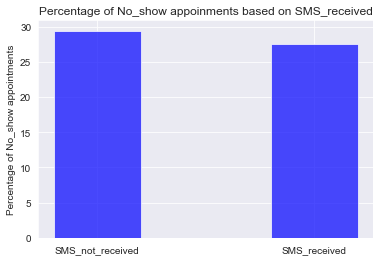

Percentage of no show in people who didn't receive SMS: 29.43273106133304 %
Percentage of no show in people who received SMS: 27.575322003325724 %


In [22]:
# Calling find_association() for SMS_received
parameter_perc, plt = find_association('SMS_received')

# Calling xticks() to update ticks labels on x-axis
plt.xticks(np.arange(2), ['SMS_not_received', 'SMS_received'])
# Calling show() to show the bar chart
plt.show()

# As obsereved earlier from the summary statistics of cleaned dataset, 
# There two unique values in this column-(0 for no_SMS or 1 for SMS_received)
# Printing percentages of no show for each of them

print("Percentage of no show in people who didn't receive SMS:", parameter_perc[0],"%")
print("Percentage of no show in people who received SMS:", parameter_perc[1],"%")

### Research Question 3: No show trends among the people of different age.

#### There can be 101 different values in Age column ranging from 0 to 100.

In [23]:
# Finding number of different values in Age column
age_values= df.Age.value_counts()
age_values.size

100

#### Actually, there are 100 different values in Age column.

#### Finding number of different values in Age column with no show appointments

In [24]:
no_show_age_values = df.Age[Not_showed].value_counts()
no_show_age_values.size

98

#### There are 98 different values in age column for no show appointments.
1. This shows that there are patients of two different age values who always showed up for their appointments.
2. As the size of 'age_values' and 'no_show_age_values' series is not equal, they can not be used to compute the percentage of no show rate for each age value from 0 to 100.
3. This issue can be solved by combining them in one dataframe. Dataframe will map all values in these two serieses together and fill any the missing values with null values.

#### Creating dataframe 'df_age' and printing it's information

In [25]:
frame = {'total':age_values,'no_show': no_show_age_values}
df_age = pd.DataFrame(frame)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   total    100 non-null    int64  
 1   no_show  98 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


1. This dataframe has 100 rows (each for different age value) and 2 columns. 
2. Column 'total' shows total number of patients in dataset with perticular age and column 'no_show' shows the number of patients in same group who missed their appointments.
3. Column 'no_show' in this dataframe has to null values which need to be filled with 0 for percentage calculations.
4. Also, datatype of 'no_show' column needs to be changed to int.

#### Filling null value in 'df_age' dataframe with 0

In [26]:
df_age.fillna(0, inplace=True)

#### Changing datatype of 'no_show' column from float to int

In [27]:
# change datatype of no_show column in df_age dataframe to int
df_age['no_show']= df_age['no_show'].astype(int)

#### Calculating percentage of no show appointments in each age group and assigning these values in column 'no_show_perc' in 'df_age' dataframe

In [28]:
df_age= df_age.assign(no_show_perc = lambda x: x.no_show * 100 / x.total)

#### Collecting maximum and minimum percentage of no show appointments 

In [29]:
max_perc = df_age.no_show_perc.max()
min_perc = df_age.no_show_perc.min()

#### Getting corresponding values of ages for maximum and minimum percentage of no show appointments

In [30]:
max_perc_age= df_age.index[df_age.no_show_perc == max_perc].tolist()
min_perc_age= df_age.index[df_age.no_show_perc == min_perc].tolist()

#### Plotting percentage of no_show appoinments among the patients of different age group

Highest percentage of no_show is 50.0% for age [95]
Lowest percentage of no_show is 0.0% for age [97, 100]


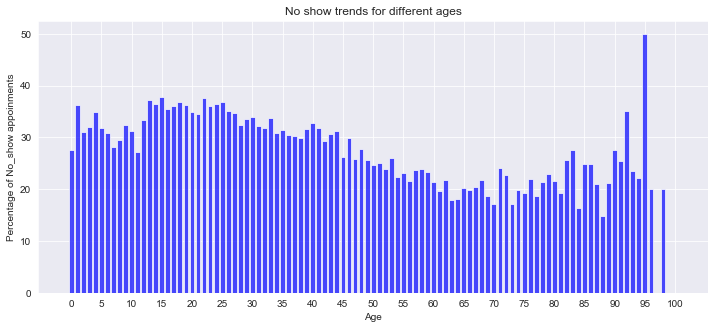

In [36]:
# Creating sub-plot for bar chart
plt.subplots(figsize=(12,5))
# Plotting bar chart
plt.bar(df_age.index, df_age['no_show_perc'], color='b', alpha=.7);
# Providing x-axis ticks values
plt.xticks(np.linspace(0, 100, 21));
# x-axis label
plt.xlabel("Age")
# y-axis label
plt.ylabel("Percentage of No_show appoinments")
# Title of the bar chart
plt.title("No show trends for different ages")

# Printing maximum and minimum percentage of no show appointments with their corresponding age group
print("Highest percentage of no_show is {}% for age {}".format(max_perc, max_perc_age))
print("Lowest percentage of no_show is {}% for age {}".format(min_perc, min_perc_age))

### Research Question 4: Does time elapsed between appointment setup date and actual appointment date affects the trends of no show?

#### Calculating percentage of no show appointments for different values in 'Diff_days' column

In [32]:
no_show_diff_days_perc= (df.Diff_days[Not_showed].value_counts()) *100/(df.Diff_days.value_counts())
no_show_diff_days_perc

0      21.350470
1      23.825104
2      23.473492
3      23.270321
4      26.609704
         ...    
154    60.000000
161    18.181818
168    12.500000
175    37.500000
178    20.000000
Name: Diff_days, Length: 128, dtype: float64

#### Plotting percentage of no show appointments for different values in 'Diff_days' column

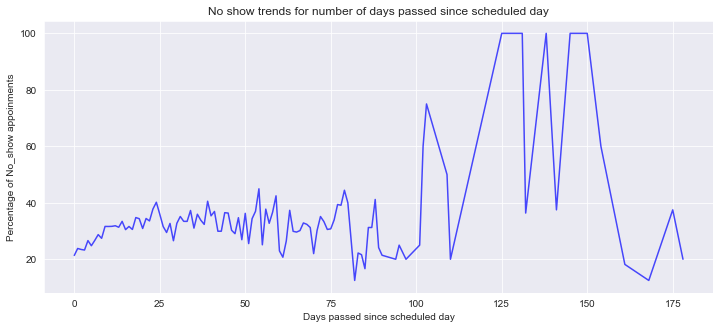

In [53]:
# Creating sub-plot for line chart
plt.subplots(figsize=(12,5))
# Plotting line chart
plt.plot(no_show_diff_days_perc.dropna(), color='b', alpha=.7);
# x-axis label
plt.xlabel("Days passed since scheduled day")
# y-axis label
plt.ylabel("Percentage of No_show appoinments")
# Title of the bar chart
plt.title("No show trends for number of days passed since scheduled day");

### Research Question 5: Weather an enrollment in healthcare walefare program affects the no show rate?

As the column containing data regarding healthcare program enrollment "Scholarship' has just two different possible values(0 or 1), I will be using find_associatin() function to get the no show appointment rate.

#### Calling find_association() for Scholarship

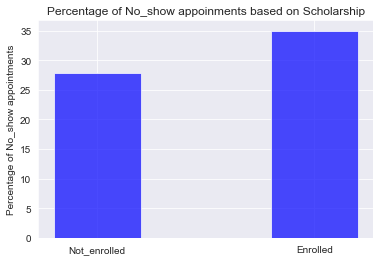

Percentage of no show in people who are not enrolled in healthcare walefare program: 27.857175681264646 %
Percentage of no show in people who are enrolled in healthcare walefare program: 34.972268025783244 %


In [34]:
# calling find_association() for Scholarship
parameter_perc, plt = find_association('Scholarship')

# calling xticks() to update ticks labels on x-axis
plt.xticks(np.arange(2), ['Not_enrolled', 'Enrolled'])
# calling show() to show the bar chart
plt.show()

# As obsereved earlier from the summary statistics of cleaned dataset, 
# there two unique values in this column-(0 for no enrollment or 1 for enrollment in healthcare program)
# printing percentages of no show for each of them

print("Percentage of no show in people who are not enrolled in healthcare walefare program:", parameter_perc[0],"%")
print("Percentage of no show in people who are enrolled in healthcare walefare program:", parameter_perc[1],"%")

<a id='conclusions'></a>
## Conclusions

From above analysis, following conclusions can be drawn:

1. The percentage of females and males who did not show up for their appointments is almost equal. 
2. Sending SMS about the appointment to patients does not reduce the chances of no show.
3. General trend in bar chart shows that no show rate is more in youger people than in older. This could be because older people are more concerned about their health issues than younger people. 
4. Percentage of no show increases as the gap between appointment scheduled date and actual appointment date increases. This could be because some people forget about things if lot of time passes in between unless they use some kind of reminder.
5. People enrolled in healthcare walefare program has more no show rate than people who are not enrolled.

### Limitations:
These conclusions are strictly based on the observations made by cleaning and visualzing different characteristics of the used dataset. Any inferential statistical methods are not used to make the inferences or conclusions. Also, some rows has been deleted because of missing values or invalid values in some columns. This might affect the analysis results.

### References:

I have used official documentation for numpy, pandas, matplotlib and sns to complete the documents.